<a href="https://colab.research.google.com/github/kevinCortial/graphlearning/blob/main/Pre_traitement_graph_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center> Data pre-processing for graph learning </center></h1>

<center> Kévin CORTIAL et Taoufik JARMOUNI &nbsp;&nbsp;&nbsp; | &nbsp;&nbsp;&nbsp; Open Studio UCA IP / Atlas des Synergies Productives &nbsp;&nbsp;&nbsp; </center>

Product Space : 

Download : https://github.com/apachot/Knowhow_proximities/blob/main/input/HS_similarity_usingCF.csv

This graph represents the proximity of industrial know-how between the product classes of the HS nomenclature, independently of the country or territory observed. This graph was built by the analysis of thousands of websites of French companies to label the products they manufacture. From these collected data, a recommendation system, based on collaborative filtering, has allowed to establish links between the products of the HS nomenclature that have the strongest productive proximity.

Cora Dataset

Download : https://paperswithcode.com/dataset/cora 

The Cora dataset consists of 2708 scientific publications classified into one of seven classes. The citation network consists of 5429 links. Each publication in the dataset is described by a 0/1-valued word vector indicating the absence/presence of the corresponding word from the dictionary. The dictionary consists of 1433 unique words.

In [ ]:
pip install community

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

from community import community_louvain
from google.colab import drive

In [ ]:
#This cell allows us to grab our needed resources from Google Drive directly

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


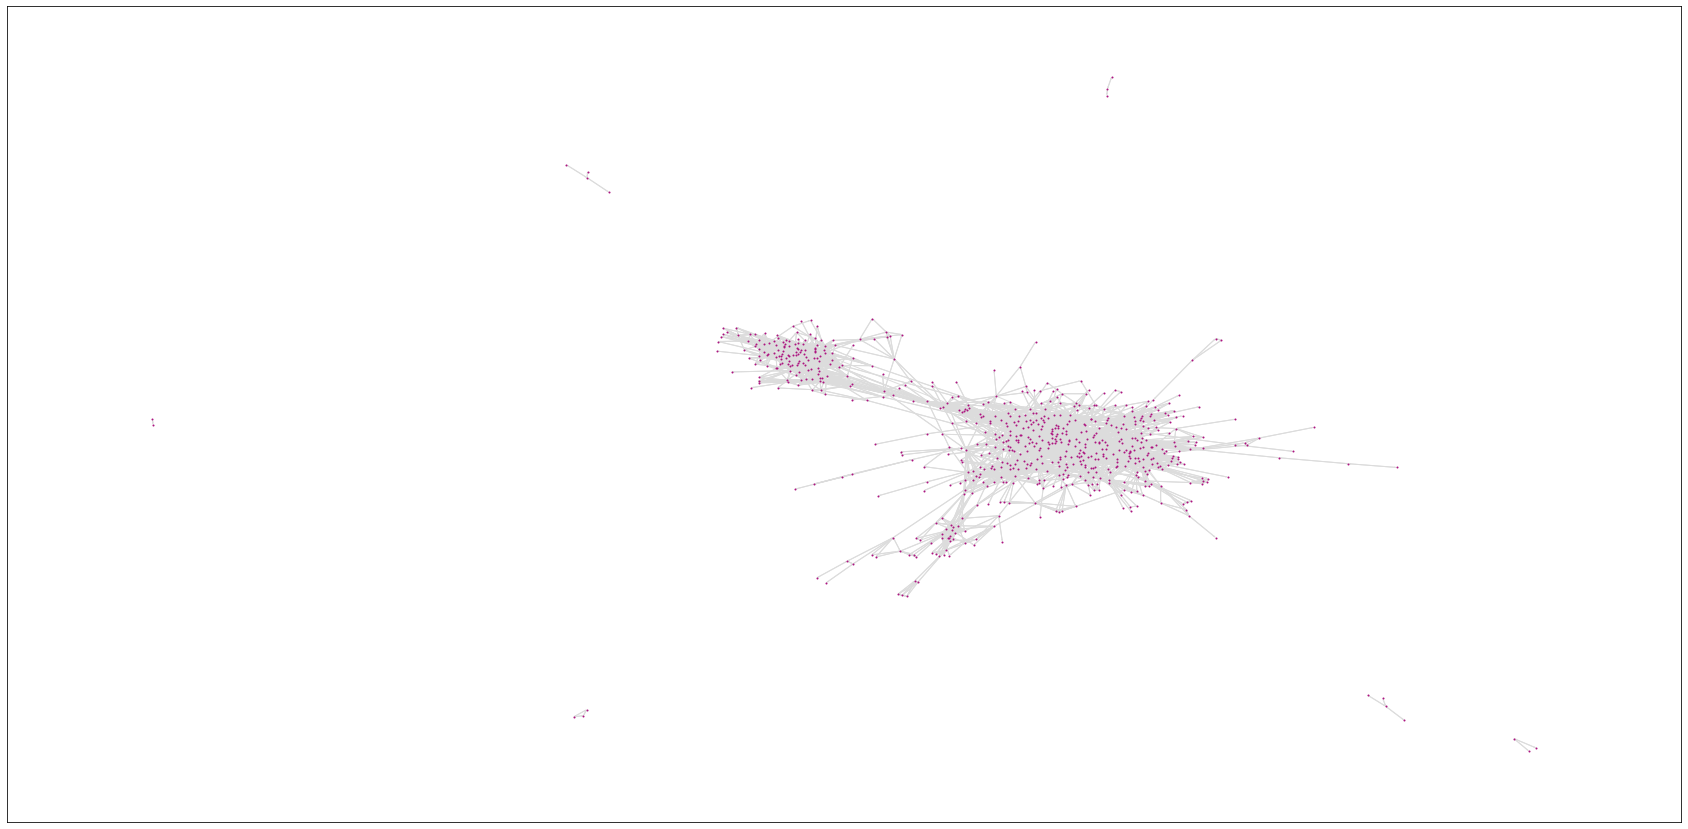

In [ ]:
# This cell allows to transform a dataframe (that has 3 columns, each line represents one link between two nodes, 
# while the third column is the weight) into a networkx graph

def get_graph_from_dataframe(dataframe):
  # We only need the three needed columns
  dataframe = dataframe[["code_hs4", "code_hs4_linked", "similarity_score"]]
  dataframe.columns = ['source', 'dest', 'coef']
  # We delete every line that has a weight of zero
  data_no_zero = dataframe[dataframe['coef'] != 0]
  dataframe = pd.crosstab(data_no_zero.source, data_no_zero.dest, dropna=False)
  # At this point we can transform the dataframe intro an adjacency matrix
  idx = dataframe.columns.union(dataframe.index)
  dataframe = dataframe.reindex(index = idx, columns=idx, fill_value=0)
  G = nx.from_pandas_adjacency(dataframe, create_using = nx.DiGraph())
  plt.figure(figsize=(30, 15))

  nx.draw_networkx(G, node_size=1, with_labels=False, arrowsize=1, node_color='#ac1480', edge_color='gainsboro')
  plt.show()

  return dataframe


original_df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/HS_similarity_score.csv', delimiter = "|", dtype={"code_hs4": str, "code_hs4_linked": str})
df = get_graph_from_dataframe(original_df)

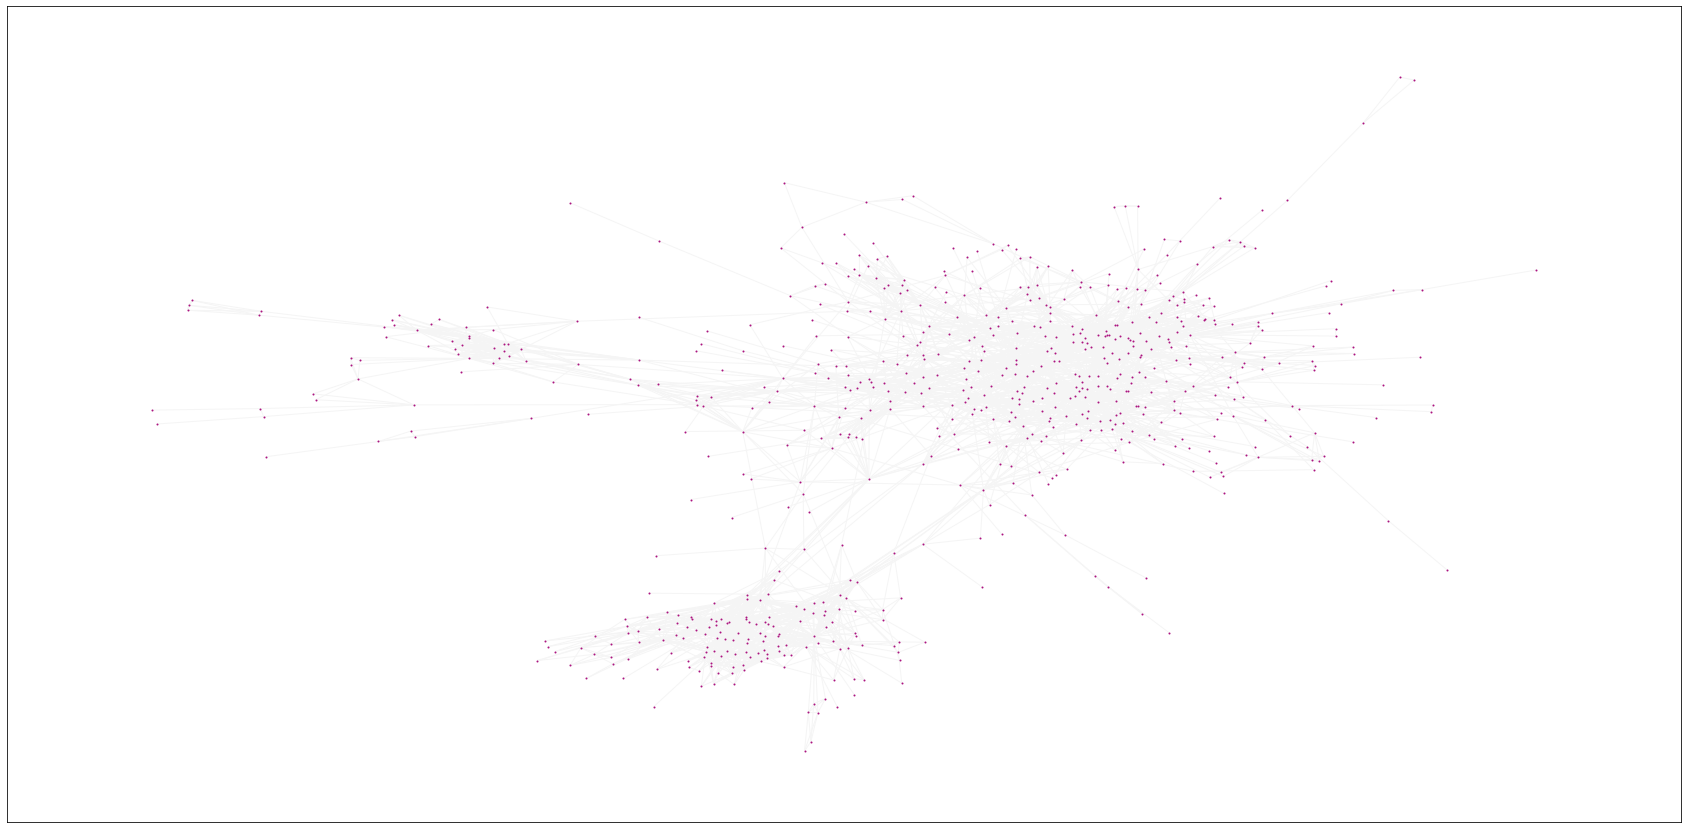

In [ ]:
# This cell allows us to use the networkx Graph built earlier to clean it up (by deleting nodes that aren't connected, 
# with an arbitrary number of 21, found manually) and colorize the nodes to be able to notice the different clusters,
# thanks to the Louvain method.


def get_clean_graph_from_dataframe(dataframe):
  G = nx.from_pandas_adjacency(dataframe)
  
  centrality = nx.closeness_centrality(G)
  centrality_sort = {k: v for k, v in sorted(centrality.items(), key=lambda item: item[1])}
  list_attached_nodes = [key for key, value in centrality_sort.items() if value < 0.1]
  G.remove_nodes_from(list_attached_nodes)

  nx.draw_networkx(G, node_size=1, with_labels=False, arrowsize=0.1, node_color='#ac1480', edge_color='whitesmoke')
  fig = plt.gcf()
  fig.set_size_inches(30, 15)
  plt.show()
  return G


G = get_clean_graph_from_dataframe(df)
nx.write_gpickle(G, "/content/drive/MyDrive/ColabNotebooks/graphOriginal.gpickle")